<a href="https://colab.research.google.com/github/Limontika/python_ML/blob/master/big_data_lab5_perceptron_multiclass_classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ФИО, группа



###Лабораторная работа №5. Распознавание рукописных цифр при помощи однослойного персептрона

В данной лабораторной работе вам предстоит обучить однослойный персептрон распознавать рукописные цифры из набора данных MNIST.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras import utils
from sklearn.metrics import confusion_matrix

In [0]:
def plot_images(images, titles, columns=5, rows=1, fontsize=20):
    fig=plt.figure(figsize=(20, 10))
    for i, img in enumerate(images[:columns*rows]):
        fig.add_subplot(rows, columns, i + 1)
        plt.axis('off')
        plt.title(titles[i], fontsize=fontsize)
        plt.imshow(img, cmap='gray')
    plt.show()

In [33]:
(X_train_original, y_train), (X_test_original, y_test) = mnist.load_data()
print(X_train_original.shape, X_test_original.shape)

(60000, 28, 28) (10000, 28, 28)


Выведите первые 5 изображений из обучающей выборки с помощью функции `plot_images`.

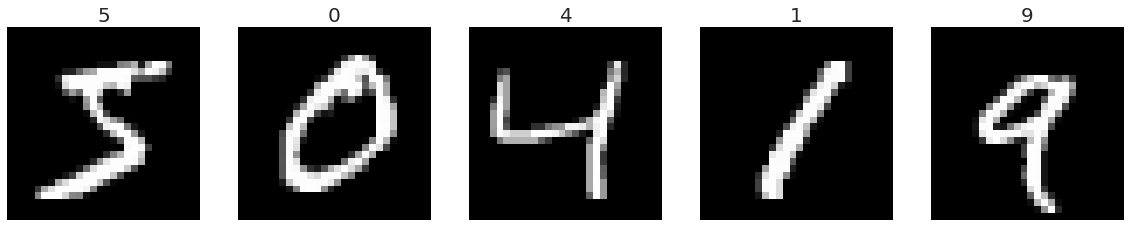

In [35]:
plot_images(X_train_original, y_train)

Закодируйте метки классов в виде векторов с помощью one-hot encoding.

*Подсказка: для решения этой задачи удобно использовать функцию `np.eye`.*

In [0]:
y_train_one_hot = utils.to_categorical(y_train)
y_test_one_hot = utils.to_categorical(y_test)


Выполните предобработку данных изображений, чтобы значение каждого пикселя принадлежало множеству $\{0, 1\}$.

In [0]:
X_train = np.round(np.array(X_train_original, dtype='float32') / 255)
X_test = np.round(np.array(X_test_original, dtype='float32') / 255)

Выведите первые 5 изображений из обучающей выборки после процедуры предобработки.

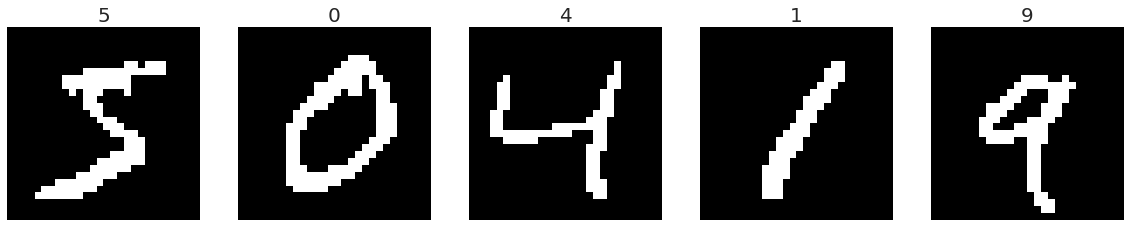

In [59]:
plot_images(X_train, y_train)

Ниже представлена заготовка класса персептрона. Реализуйте недостающие части.

In [60]:
X_train.shape

(60000, 28, 28)

In [0]:
class Perceptron:
    def __init__(self, m=784, k=10, learning_rate=0.001, num_epochs=5, verbose=True):
        self.m = m  # number of features
        self.k = k  # number of classes (neurons)
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.verbose = verbose
        self._validation_freq = 1
        self._init_params()

    # Initialize weights and biases
    def _init_params(self):
        self.b = np.ones(self.k)
        self.w = np.vstack((np.random.rand(self.m, self.k), self.b))

        # Heaviside step function

    def _activate(self, X):
        return np.vectorize(lambda x: 1 if x > 0 else 0)(X)

    # Forward pass
    def predict(self, X):
        return self._activate(np.dot(X, self.w))

    # Use delta rule to update parameters
    def _update_params(self, x, y, y_pred):
        e_i = y - y_pred
        d_i = self.learning_rate * np.dot(x.reshape((-1, 1)), e_i.reshape((1, -1)))
        self.w = self.w + d_i

    def fit(self, X, y, X_test=None, y_test=None):
        for i in range(self.num_epochs):
            for j in range(X.shape[0]):
                # Compute prediction for X[j]
                prediction = self.predict(X[j])
                y_pred = prediction
                # Update params
                self._update_params(X[j], y[j], y_pred)

            if X_test is not None and y_test is not None and self.verbose and (i + 1) % self._validation_freq == 0:
                # Compute predictions for test set and compute accuracy
                total_true = 0
                for k in range(X_test.shape[0]):
                    y_test_pred = self.predict(X_test[k])
                    e_i = y_test[k] - y_test_pred
                    if not any(e_i):
                        total_true += 1

                accuracy = total_true / X_test.shape[0]
                print("Accuracy on {}-th epoch is {:.04f}".format(i + 1, accuracy))

Обучите персептрон. Перед подачей изображений на вход персептрону, преобразуйте их в вектора размерности 784.

*Подсказка: для изменения формы массива можно воспользоваться методом `reshape`.*

In [62]:
perceptron = Perceptron()

ones = np.ones((X_train.shape[0], 1))
X_train_updated = np.hstack((X_train.reshape((-1, 784)), ones))
ones = np.ones((X_test.shape[0], 1))
X_test_updated = np.hstack((X_test.reshape((-1, 784)), ones))

perceptron.fit(X_train_updated, y_train_one_hot, X_test_updated, y_test_one_hot)

Accuracy on 1-th epoch is 0.6208
Accuracy on 2-th epoch is 0.6733
Accuracy on 3-th epoch is 0.6972
Accuracy on 4-th epoch is 0.7140
Accuracy on 5-th epoch is 0.7227


Вычислите предсказания для тестовой выборки.

*Подсказка: чтобы из one-hot encoding вернуться к десятичным цифрам, можно воспользоваться методом `argmax`.*

In [0]:
y_test_pred = np.array([np.argmax(perceptron.predict(x)) for x in X_test_updated])

Выведите первые пять изображений из тестовой выборки. В качестве заголовка к каждому изображению выведите ожидаемую (англ. expected) и предсказанную (англ. predicted) метки класса.

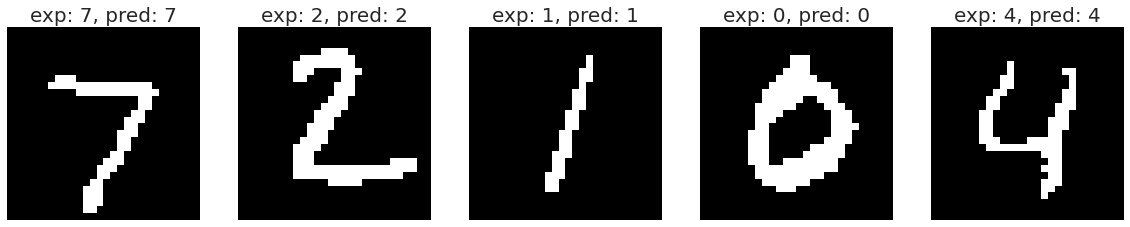

In [64]:
titles = [f'exp: {y_test[i]}, pred: {y_test_pred[i]}' for i in range(5)]
plot_images(X_test, titles)

Выведите несколько изображений из тестовой выборки, в которых персептрон допустил ошибку. В качестве заголовка к каждому изображению выведите ожидаемую (англ. expected) и предсказанную (англ. predicted) метки класса. Как вы считаете, есть ли в допущенных ошибках какая-то закономерность?


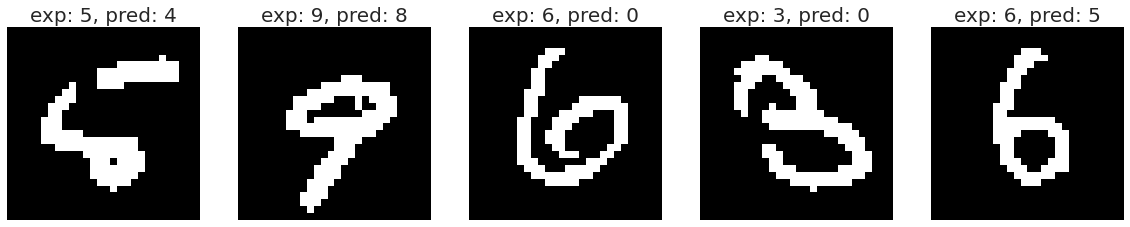

In [65]:
titles = []
images = []
for i in range(X_test_updated.shape[0]):
    if y_test_pred[i] != y_test[i]:
        titles.append(f'exp: {y_test[i]}, pred: {y_test_pred[i]}')
        images.append(X_test[i])
        if len(images) == 5:
            break

plot_images(images, titles)

**Ответ:** да, чем больше пикселей и чем сложнее они распологаются, тем сложнее просчитать

Изобразите веса нейронов в виде изображений. У вас должно получиться 10 изображений. Можно ли по полученным изображениям сделать вывод, за распознавание какой цифры отвечает каждый из нейронов?

*Подсказка: можете посмотреть [пример](https://ml4a.github.io/ml4a/looking_inside_neural_nets/).*

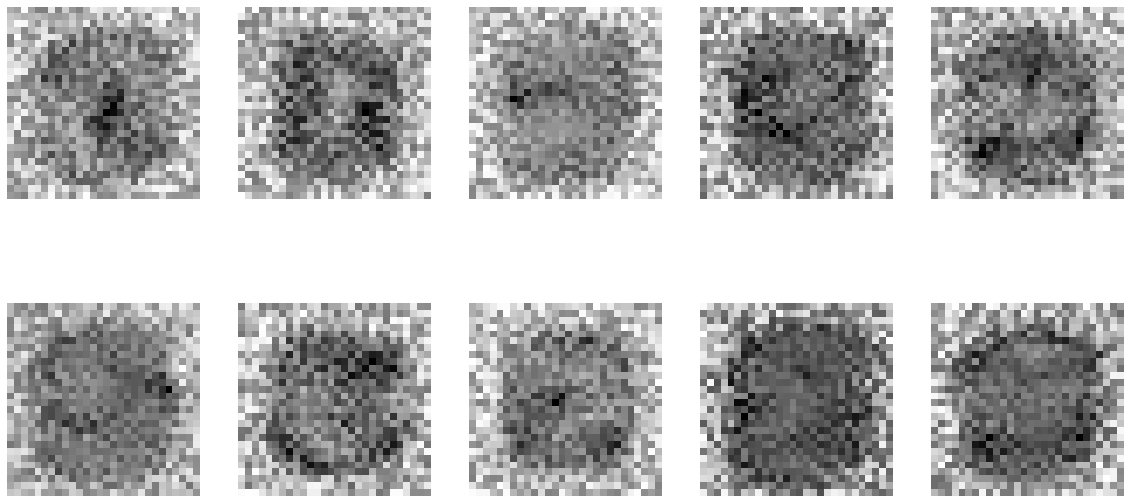

In [66]:
def plot_images2(images, titles, columns=5, rows=1, fontsize=20):
    fig = plt.figure(figsize=(20, 10))
    for i in range(columns * rows):
        fig.add_subplot(rows, columns, i + 1)
        plt.axis('off')
        plt.title(titles[i], fontsize=fontsize)
        plt.imshow(images[:, :, i], cmap='gray')
    plt.show()


neuron_images = perceptron.w[:-1, :].reshape((28, 28, 10))
empty_titles = ['' for i in range(10)]
plot_images2(neuron_images, titles=empty_titles, rows=2)

**Ответ:** ДА

Постройте матрицу ошибок (англ. confusion matrix) для полученной нейронной сети. 

Подсказка: можно воспользоваться функцией [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/0.16/modules/generated/sklearn.metrics.confusion_matrix.html). [Пример матрицы ошибок.](https://ml4a.github.io/demos/confusion_mnist/)

In [0]:
import sklearn
cm = sklearn.metrics.confusion_matrix(y_test, y_test_pred)

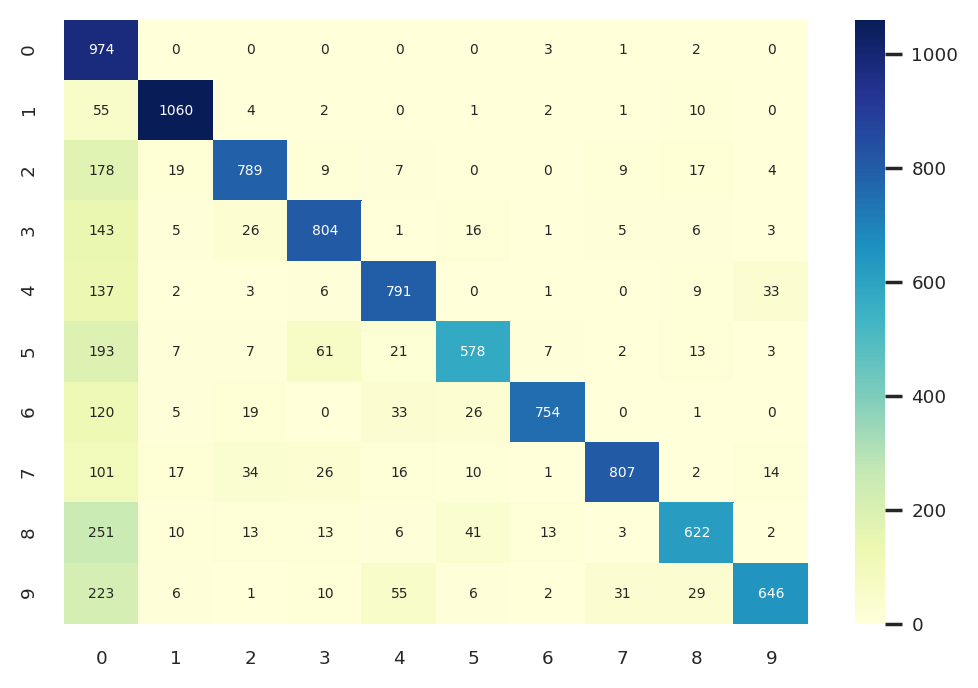

In [67]:
plt.figure(dpi=200)
sns.set(font_scale=0.6)
g = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 5}, cmap="YlGnBu")
plt.show()

По матрице ошибок определите, с какой цифрой нейронная сеть чаще всего путает цифру 3.

**Ответ:** с 0 по матрице, но я думаю 5 или 9 должно быть

### Полезные материалы
1. [Looking inside neural nets](https://ml4a.github.io/ml4a/looking_inside_neural_nets/)
2. [THE MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/)